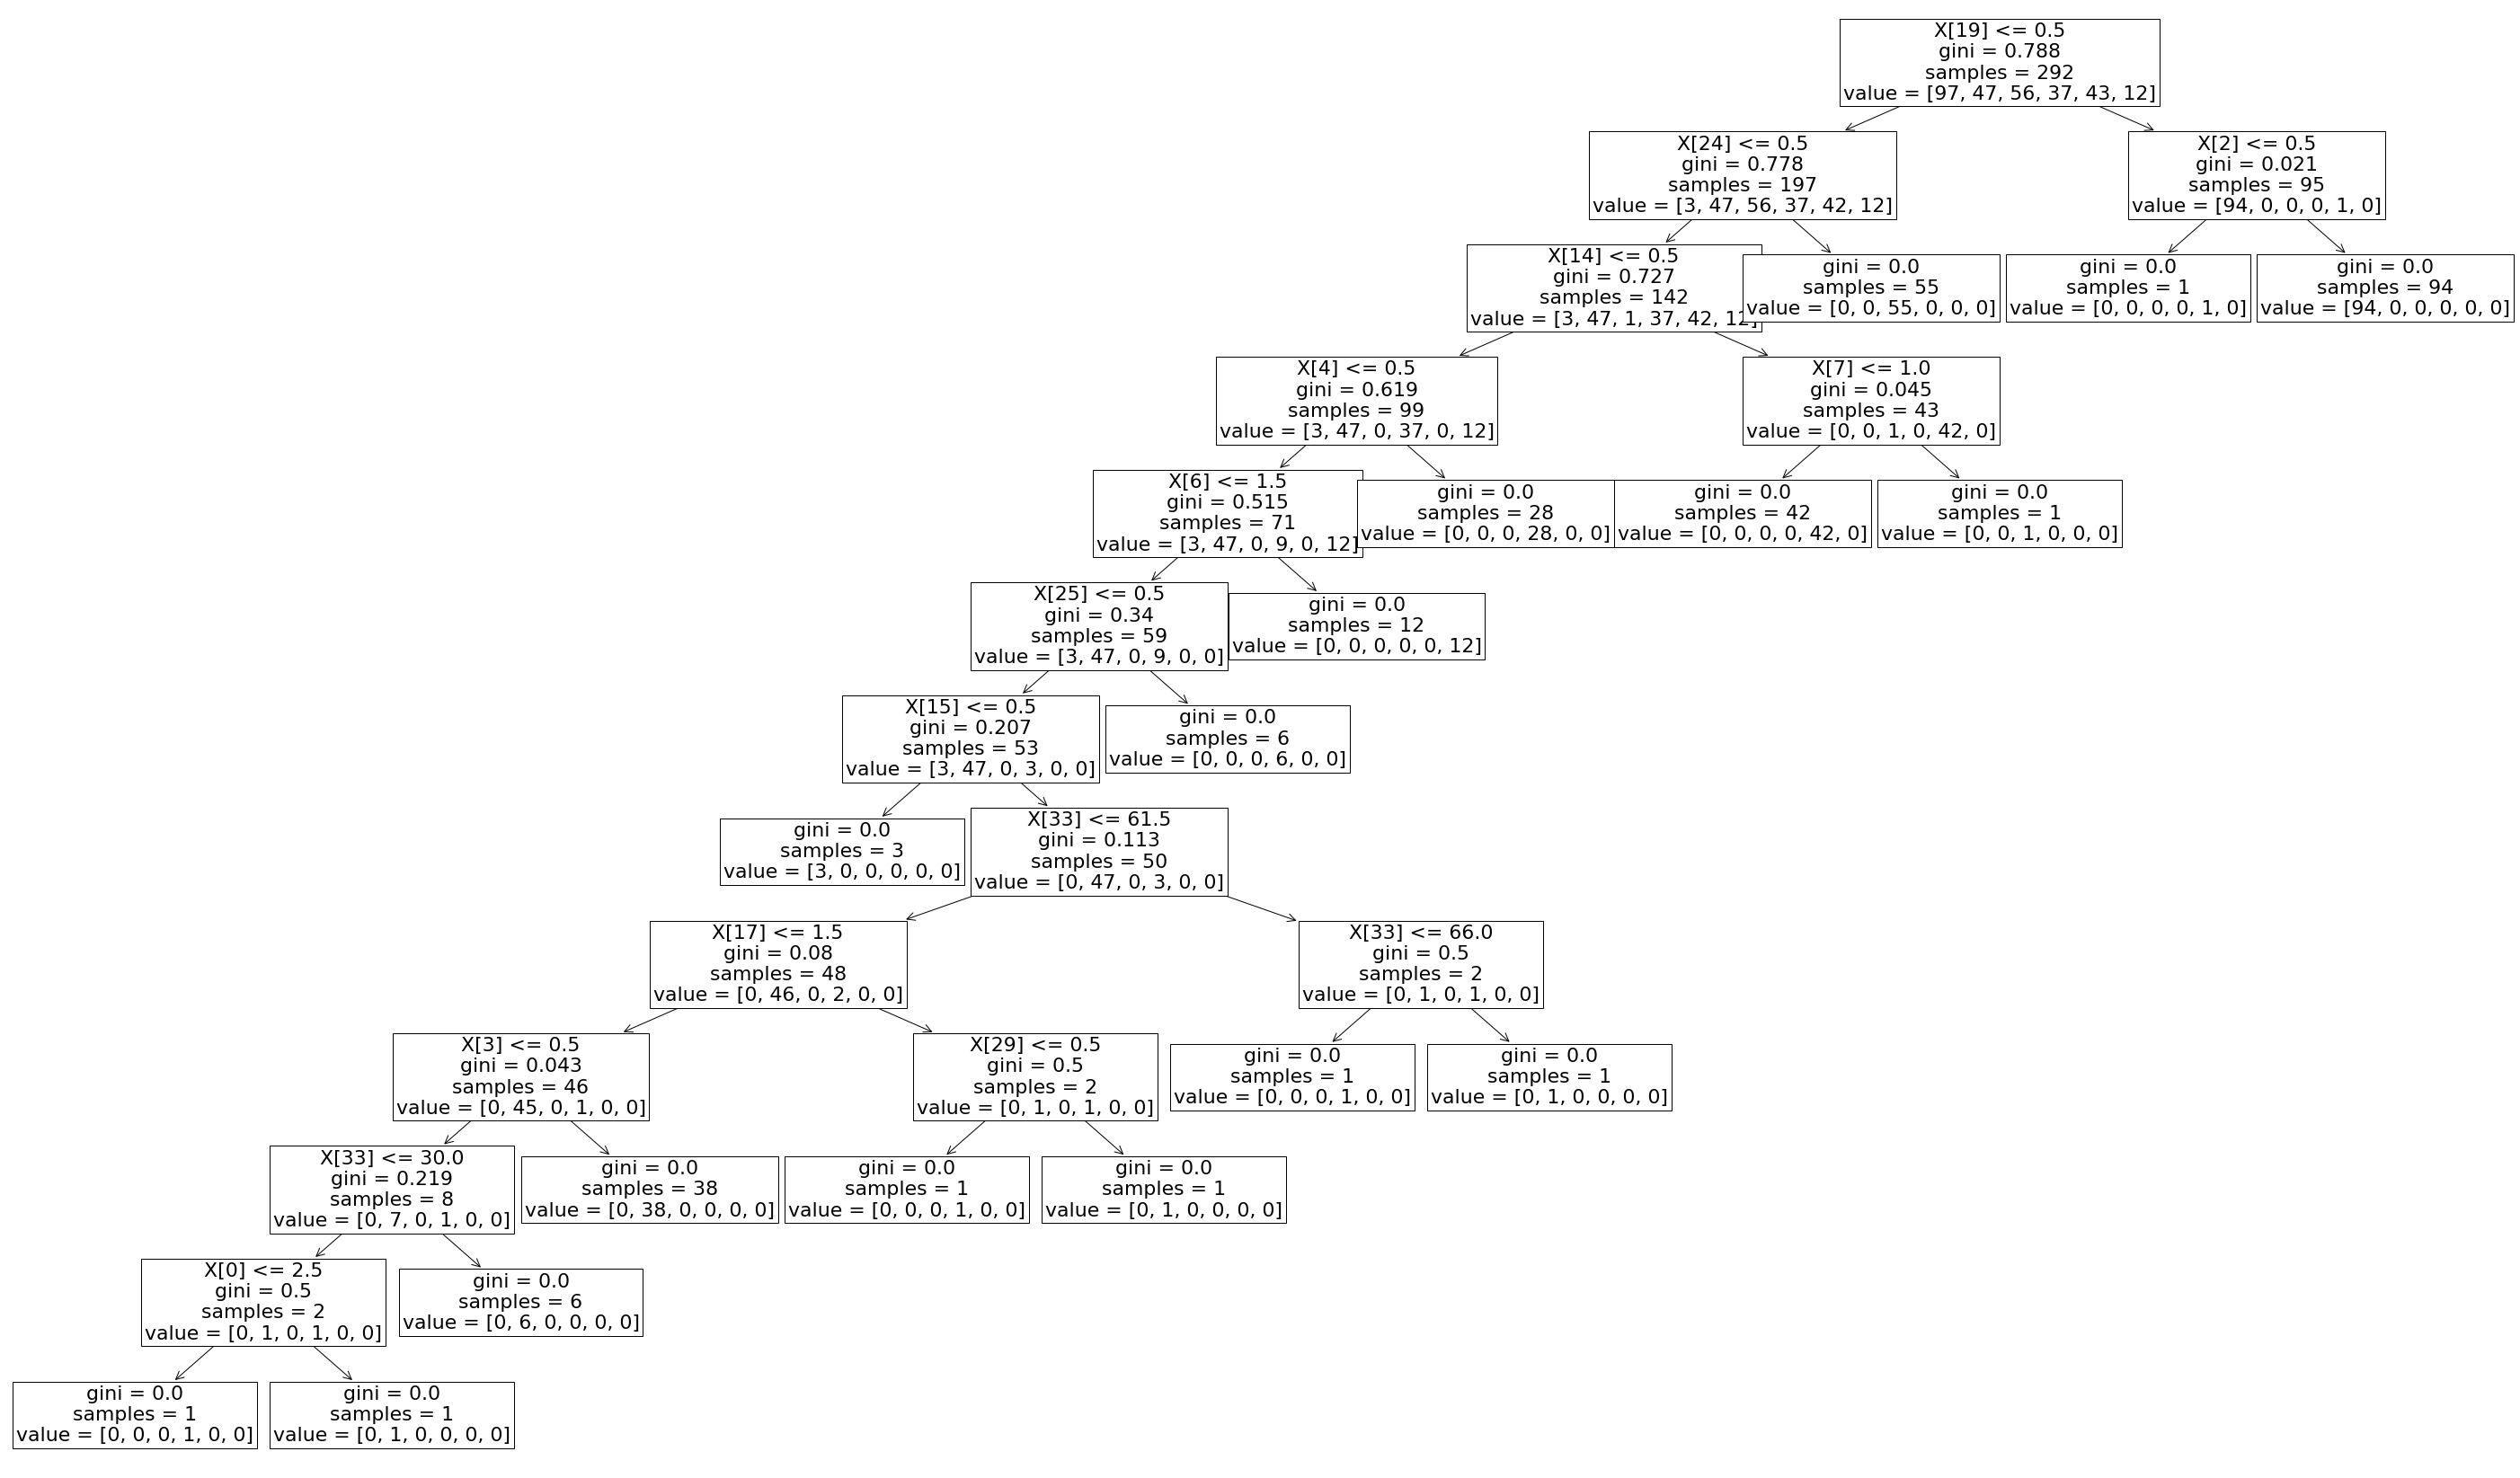

DesicionTreeClassifier (gini) - Training score:  1.0
DesicionTreeClassifier (gini) - Accuracy:  89.19
DesicionTreeClassifier (gini) - F1:  88.69



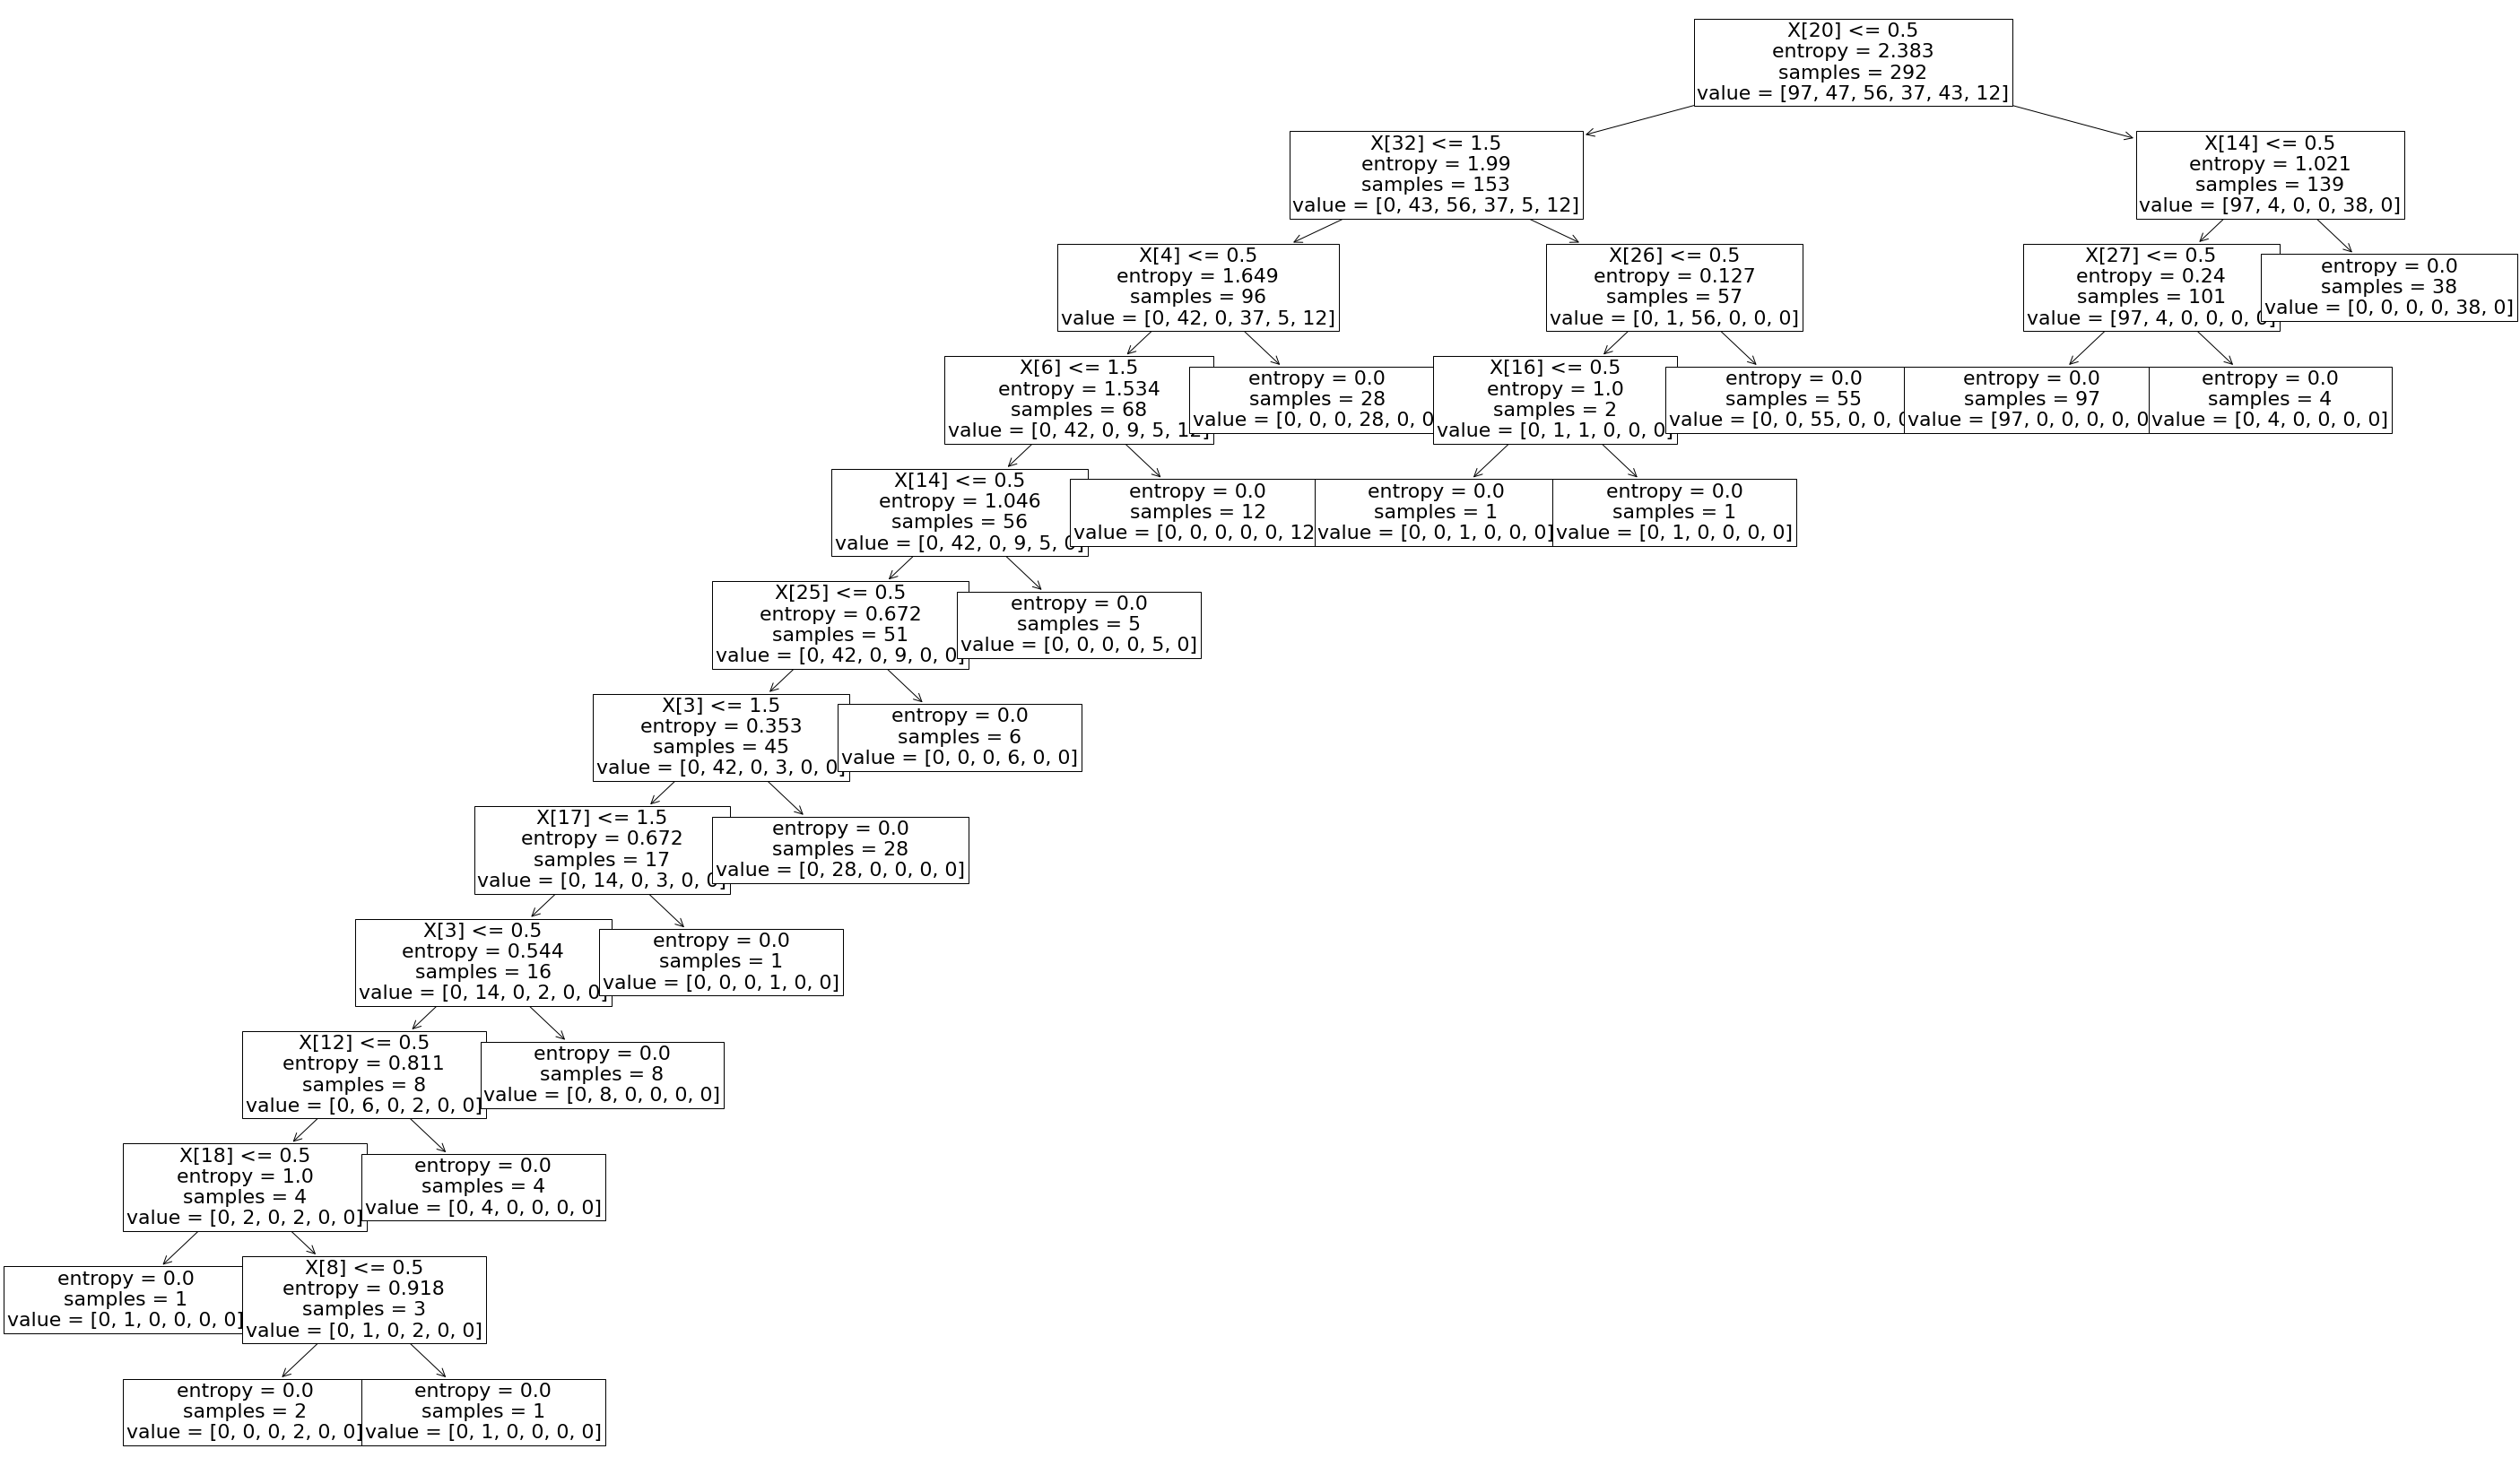

DesicionTreeClassifier - Training score:  1.0
DesicionTreeClassifier - Accuracy:  94.59
DesicionTreeClassifier - F1:  94.25

RandomForestClasifier - Training score:  1.0
RandomForestClasifier - Accuracy:  97.30
RandomForestClasifier - F1:  97.28

SVM (RBF Kernel) - Training score:  1.0
SVM (RBF Kernel) - Accuracy:  82.43
SVM (RBF Kernel) - F1:  82.88

SVM (Poly Kernel) - Training score:  1.0
SVM (Poly Kernel) - Accuracy:  94.59
SVM (Poly Kernel) - F1:  94.60

KNN - Training score:  1.0
KNN - Accuracy:  90.54
KNN - F1:  90.72

Logistic Regression - Training score:  0.9965753424657534
Logistic Regression - Accuracy:  98.65
Logistic Regression - F1:  98.65



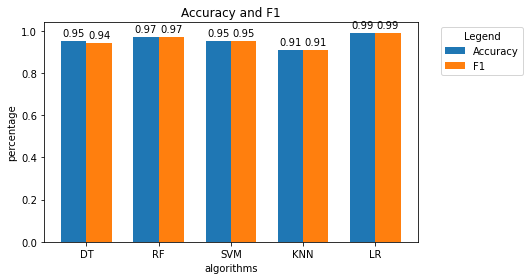

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

with open("dermatology.data") as f:
    content = f.readlines()

lines = np.array(content)

attributes_, disease_ = [], []
for i in range(0, lines.size):
  attributes, disease = np.split(lines[i].split(","), [34])
  attributes = np.array(attributes, 'float32')
  attributes_.append(attributes)
  disease = np.array(disease, 'float32')
  disease_.append(disease)

attributes_ = np.array(attributes_, 'float32')
disease_ = np.array(disease_, 'float32')

x_train, x_test, y_train, y_test= train_test_split(attributes_, disease_, test_size= 0.2, random_state=0)  

#Algoritmi

# DecisionTreeClassifier - gini
decisionTreeClf = tree.DecisionTreeClassifier(random_state=0, max_depth=32)
decisionTreeClf = decisionTreeClf.fit(x_train, y_train)
plt.figure(figsize=(50, 30))
tree.plot_tree(decisionTreeClf, fontsize=22)
plt.show()
score = decisionTreeClf.score(x_train, y_train)
print("DesicionTreeClassifier (gini) - Training score: ", score) 
y_pred = decisionTreeClf.predict(x_test)
decisionTree_acc = accuracy_score(y_test, y_pred)
print("DesicionTreeClassifier (gini) - Accuracy: ", "%.2f" % (decisionTree_acc*100))
decisionTree_f1 = f1_score(y_test, y_pred, average='weighted')
print("DesicionTreeClassifier (gini) - F1: ", "%.2f" % (decisionTree_f1*100))
print()

# DecisionTreeClassifier 
decisionTreeClf = tree.DecisionTreeClassifier(random_state=0, max_depth=32, criterion="entropy")
decisionTreeClf = decisionTreeClf.fit(x_train, y_train)
plt.figure(figsize=(50, 30))
tree.plot_tree(decisionTreeClf, fontsize=22)
plt.show()
score = decisionTreeClf.score(x_train, y_train)
print("DesicionTreeClassifier - Training score: ", score) 
y_pred = decisionTreeClf.predict(x_test)
decisionTree_acc = accuracy_score(y_test, y_pred)
print("DesicionTreeClassifier - Accuracy: ", "%.2f" % (decisionTree_acc*100))
decisionTree_f1 = f1_score(y_test, y_pred, average='weighted')
print("DesicionTreeClassifier - F1: ", "%.2f" % (decisionTree_f1*100))
print()

# RandomForestClasifier
randomForestClf = RandomForestClassifier(criterion="entropy", random_state=0, n_jobs=-1)
randomForestClf = randomForestClf.fit(x_train, y_train)
trainingScore = randomForestClf.score(x_train, y_train)
print("RandomForestClasifier - Training score: ", trainingScore) 
y_predicted = randomForestClf.predict(x_test)
randomForest_acc = accuracy_score(y_test, y_predicted)
print("RandomForestClasifier - Accuracy: ", "%.2f" % (randomForest_acc*100))
randomForest_f1 = f1_score(y_test, y_predicted, average='weighted')
print("RandomForestClasifier - F1: ", "%.2f" % (randomForest_f1*100))
print()

# SVM - RBF kernel
#standardizer = StandardScaler()
#attributes_standardized = standardizer.fit_transform(x_train)
SVM_Clf= svm.SVC(kernel='rbf', gamma=0.1).fit(x_train, y_train)
score = SVM_Clf.score(x_train, y_train)
print("SVM (RBF Kernel) - Training score: ", score) 
rbf_pred = SVM_Clf.predict(x_test)
SVM_acc = accuracy_score(y_test, rbf_pred)
print("SVM (RBF Kernel) - Accuracy: ", "%.2f" % (SVM_acc*100))
SVM_f1= f1_score(y_test, rbf_pred, average='weighted')
print("SVM (RBF Kernel) - F1: ", "%.2f" % (SVM_f1*100))
print()

# SVM - Poly kernel
#standardizer = StandardScaler()
#attributes_standardized = standardizer.fit_transform(x_train)
SVM_Clf= svm.SVC(kernel='poly', gamma=0.1).fit(x_train, y_train)
score = SVM_Clf.score(x_train, y_train)
print("SVM (Poly Kernel) - Training score: ", score) 
poly_pred = SVM_Clf.predict(x_test)
SVM_acc = accuracy_score(y_test, poly_pred)
print("SVM (Poly Kernel) - Accuracy: ", "%.2f" % (SVM_acc*100))
SVM_f1 = f1_score(y_test, poly_pred, average='weighted')
print("SVM (Poly Kernel) - F1: ", "%.2f" % (SVM_f1*100))
print()

# KNN
#standardizer = StandardScaler()
#attributes_standardized = standardizer.fit_transform(x_train)
KNNClf = neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
pipe = Pipeline([("knn", KNNClf)])
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(x_train, y_train)
classifier.best_estimator_.get_params()["knn__n_neighbors"]
optimizedKNNClf = neighbors.KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
optimizedKNNClf.fit(x_train, y_train)
score = optimizedKNNClf.score(x_train, y_train)
print("KNN - Training score: ", score) 
y_predicted = optimizedKNNClf.predict(x_test)
optimizedKNN_acc = accuracy_score(y_test, y_predicted)
print("KNN - Accuracy: ", "%.2f" % (optimizedKNN_acc*100))
optimizedKNN_f1 = f1_score(y_test, y_predicted, average='weighted')
print("KNN - F1: ", "%.2f" % (optimizedKNN_f1*100))
print()

# Logistic Regression
logisticRegressionClf = LogisticRegression(random_state=0, multi_class="ovr",  max_iter=200)
logisticRegressionClf = logisticRegressionClf.fit(x_train, y_train)
trainingScore = logisticRegressionClf.score(x_train, y_train)
print("Logistic Regression - Training score: ", trainingScore) 
y_predicted = logisticRegressionClf.predict(x_test)
logisticRegression_acc = accuracy_score(y_test, y_predicted)
print("Logistic Regression - Accuracy: ", "%.2f" % (logisticRegression_acc*100))
logisticRegression_f1 = f1_score(y_test, y_predicted, average='weighted')
print("Logistic Regression - F1: ", "%.2f" % (logisticRegression_f1*100))
print()

# acc i f1

y = ('DT', 'RF','SVM', 'KNN', 'LR')
x_acc = (round(decisionTree_acc, 2), round(randomForest_acc, 2), round(SVM_acc, 2), round(optimizedKNN_acc, 2), round(logisticRegression_acc, 2))
x_f1 = (round(decisionTree_f1, 2), round(randomForest_f1, 2), round(SVM_f1, 2), round(optimizedKNN_f1, 2), round(logisticRegression_f1, 2))

y_pos = np.arange(len(y))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(y_pos - width/2, x_acc, width, label='Accuracy')
rects2 = ax.bar(y_pos + width/2, x_f1, width, label='F1')

ax.set_ylabel('percentage')
ax.set_xlabel('algorithms')
ax.set_title('Accuracy and F1')
ax.set_xticks(y_pos)
ax.set_xticklabels(y)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.legend(handles=[rects1, rects2], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()